In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [181]:
df_format=pd.read_csv('/content/Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv')
df_test_value=pd.read_csv('/content/Pump_it_Up_Data_Mining_the_Water_Table_-_Test_set_values.csv')
df_train_label=pd.read_csv('/content/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')
df_train_value=pd.read_csv('/content/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_values.csv')

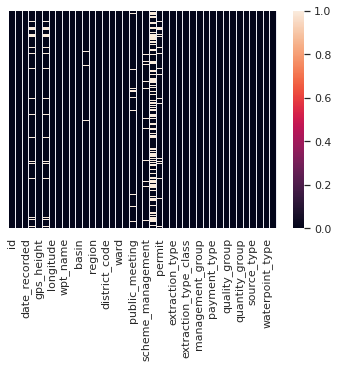

In [115]:
sns.heatmap(df_train_value.isnull(),yticklabels=False)

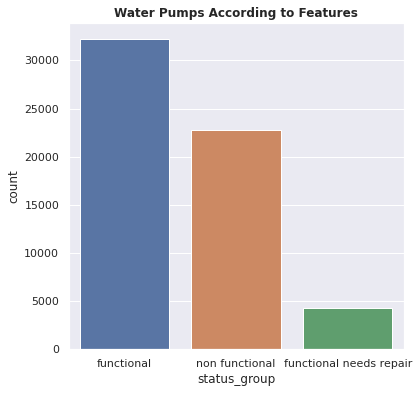

In [58]:
plt.figure(figsize=(6,6))
plt.title("Water Pumps According to Features",fontsize=12, fontweight='bold')
sns.countplot(x=df_train_label['status_group'], data=df_train_label);

In [ ]:
#----------------EDA---------------------

In [182]:
op_year = []
for i in range(len(df_train_value.date_recorded)):
  diff = (int)(df_train_value.date_recorded[i].split("-")[0]) - (df_train_value.construction_year[i])
  if(df_train_value.construction_year[i] == 0):
    diff = 0
    op_year.append(diff)
  else:
    op_year.append(diff)




In [183]:
op_year2 = []
for i in range(len(df_test_value.date_recorded)):
  diff = (int)(df_test_value.date_recorded[i].split("-")[0]) - (df_test_value.construction_year[i])
  if(df_test_value.construction_year[i] == 0):
    diff = 0
    op_year2.append(diff)
  else:
    op_year2.append(diff)

In [184]:
op_year = np.array(op_year)
df_train_value['op_year'] = op_year.tolist()

In [185]:
op_year2 = np.array(op_year2)
df_test_value['op_year2'] = op_year2.tolist()

In [186]:
def get_n(x,n):
  list_a = set(x.value_counts().index[:n].values) 
  x[~x.isin(list_a)] = 'Other'
  return x
 
df_train_value.funder = get_n(df_train_value.funder,50)
df_train_value.installer = get_n(df_train_value.installer,50) 
df_test_value.funder = get_n(df_test_value.funder,50)
df_test_value.installer = get_n(df_test_value.installer,50) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [187]:
df_dummified_region = pd.get_dummies(df_train_value, columns = ['region'])

In [188]:
df_dummified_region2 = pd.get_dummies(df_test_value, columns = ['region'])

In [189]:
for i in range(len(df_train_value.public_meeting)):
  if(pd.isnull(df_train_value.public_meeting[i]) == True):
    df_train_value.public_meeting[i] = True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [190]:
for i in range(len(df_test_value.public_meeting)):
  if(pd.isnull(df_test_value.public_meeting[i]) == True):
    df_test_value.public_meeting[i] = True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [191]:
df_dummified_public_meeting = pd.get_dummies(df_train_value, columns = ['public_meeting'],drop_first=True)
    

In [192]:
df_dummified_public_meeting2 = pd.get_dummies(df_test_value, columns = ['public_meeting'],drop_first=True)

In [193]:
df_dummified_region = pd.concat([df_dummified_region,df_dummified_public_meeting.public_meeting_True], axis=1)

In [194]:
df_dummified_region2 = pd.concat([df_dummified_region2,df_dummified_public_meeting2.public_meeting_True], axis=1)

In [195]:
df_train_value = df_dummified_region

In [196]:
df_test_value = df_dummified_region2

In [197]:
df_train_value.drop(columns = ["public_meeting"] , inplace=True)


In [198]:
df_test_value.drop(columns = ["public_meeting"] , inplace=True)

In [199]:
df_dummy_funder = pd.get_dummies(df_train_value, columns = ['funder'] )


In [200]:
df_dummy_funder2 = pd.get_dummies(df_test_value, columns = ['funder'] )

In [201]:
df_train_value = df_dummy_funder

In [202]:
df_test_value = df_dummy_funder2

In [203]:
from random import randint

In [204]:
for i in range((len(df_train_value.permit))):
  rand = randint(0,100)
  if(df_train_value.permit[i] != True and df_train_value.permit[i] != False):
    if(rand < 69):
      df_train_value.permit[i] = True
    else:
      df_train_value.permit[i] = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [205]:
for i in range((len(df_test_value.permit))):
  rand = randint(0,100)
  if(df_test_value.permit[i] != True and df_test_value.permit[i] != False):
    if(rand < 69):
      df_test_value.permit[i] = True
    else:
      df_test_value.permit[i] = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [206]:
df_train_value = pd.get_dummies(df_train_value, columns = ["extraction_type_class","management_group","payment_type","quality_group","quantity","source_type","waterpoint_type"])


In [207]:
df_test_value = pd.get_dummies(df_test_value, columns = ["extraction_type_class","management_group","payment_type","quality_group","quantity","source_type","waterpoint_type"])


In [208]:
for i in range (len(df_train_label)):
  if (df_train_label.iat[i,1] == 'functional'):
    df_train_label.iat[i,1] = 2
  elif (df_train_label.iat[i,1] == 'non functional'):
    df_train_label.iat[i,1] = 0
  else:
    df_train_label.iat[i,1] = 1

In [209]:
df_train_value.drop(columns = ["date_recorded","wpt_name","num_private","basin","subvillage","region_code", "lga",
                              "ward","recorded_by","extraction_type_group","extraction_type","management","payment",
                              "quantity_group","source_class", "source" ,"water_quality", "waterpoint_type_group",
                              "scheme_management", "scheme_name", "construction_year"], inplace = True)

In [210]:
df_test_value.drop(columns = ["date_recorded","wpt_name","num_private","basin","subvillage","region_code", "lga",
                              "ward","recorded_by","extraction_type_group","extraction_type","management","payment",
                              "quantity_group","source_class", "source" ,"water_quality", "waterpoint_type_group",
                              "scheme_management", "scheme_name", "construction_year"], inplace = True)

In [145]:
df_train_value

,id,amount_tsh,gps_height,installer,longitude,latitude,district_code,population,permit,op_year,...,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,69572,6000.0,1390,Other,34.938093,-9.856322,5,109,False,12,...,0,0,1,0,1,0,0,0,0,0
1,8776,0.0,1399,Other,34.698766,-2.147466,2,280,True,3,...,0,0,0,0,1,0,0,0,0,0
2,34310,25.0,686,World vision,37.460664,-3.821329,4,250,True,4,...,0,0,0,0,0,1,0,0,0,0
3,67743,0.0,263,UNICEF,38.486161,-11.155298,63,58,True,27,...,0,0,0,0,0,1,0,0,0,0
4,19728,0.0,0,Other,31.130847,-1.825359,1,0,True,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,CES,37.169807,-3.253847,5,125,True,14,...,0,0,1,0,1,0,0,0,0,0
59396,27263,4700.0,1212,Other,35.249991,-9.070629,4,56,True,15,...,1,0,0,0,1,0,0,0,0,0
59397,37057,0.0,0,Other,34.017087,-8.750434,7,0,False,0,...,0,0,0,0,0,0,0,1,0,0
59398,31282,0.0,0,Other,35.861315,-6.378573,4,0,True,0,...,0,1,0,0,0,0,0,1,0,0


In [211]:
df_train = pd.get_dummies(df_train_value, columns = ['installer'] )

In [212]:
df_test = pd.get_dummies(df_test_value, columns = ['installer'] )

In [213]:
df_train = pd.get_dummies(df_train, columns = ['permit'], drop_first=True )

In [214]:
df_test = pd.get_dummies(df_test, columns = ['permit'], drop_first=True )

In [215]:
df_train = df_train_label.merge(df_train, how = "outer", on = "id")    

In [216]:
df_train

,id,status_group,amount_tsh,gps_height,longitude,latitude,district_code,population,op_year,region_Arusha,...,installer_TCRS,installer_TWESA,installer_UNICEF,installer_Villagers,installer_WEDECO,installer_WU,installer_WVT,installer_World Vision,installer_World vision,permit_True
0,69572,2,6000.0,1390,34.938093,-9.856322,5,109,12,0,...,0,0,0,0,0,0,0,0,0,0
1,8776,2,0.0,1399,34.698766,-2.147466,2,280,3,0,...,0,0,0,0,0,0,0,0,0,1
2,34310,2,25.0,686,37.460664,-3.821329,4,250,4,0,...,0,0,0,0,0,0,0,0,1,1
3,67743,0,0.0,263,38.486161,-11.155298,63,58,27,0,...,0,0,1,0,0,0,0,0,0,1
4,19728,2,0.0,0,31.130847,-1.825359,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,2,10.0,1210,37.169807,-3.253847,5,125,14,0,...,0,0,0,0,0,0,0,0,0,1
59396,27263,2,4700.0,1212,35.249991,-9.070629,4,56,15,0,...,0,0,0,0,0,0,0,0,0,1
59397,37057,2,0.0,0,34.017087,-8.750434,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59398,31282,2,0.0,0,35.861315,-6.378573,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [217]:
df_train["status_group"] = df_train["status_group"].astype(int)

In [218]:
df_train["longitude"] = df_train["longitude"].replace(0,df_train["longitude"].median())
df_train.longitude.describe()

count    59400.000000
mean        35.142320
std          2.567684
min         29.607122
25%         33.354079
50%         34.908781
75%         37.178387
max         40.345193
Name: longitude, dtype: float64

In [219]:
df_test["longitude"] = df_test["longitude"].replace(0,df_test["longitude"].median())
df_test.longitude.describe()

count    14850.000000
mean        35.135670
std          2.574770
min         29.612776
25%         33.326568
50%         34.901426
75%         37.196594
max         40.325016
Name: longitude, dtype: float64

In [220]:
df_test.rename(columns = {'op_year2':'op_year'}, inplace = True)

In [108]:
# df_train_label=pd.read_csv('/content/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')


In [109]:
# for i in range (len(df_train_label)):
#   if (df_train_label.iat[i,1] == 'functional'):
#     df_train_label.iat[i,1] = 2
#   elif (df_train_label.iat[i,1] == 'non functional'):
#     df_train_label.iat[i,1] = 0
#   else:
#     df_train_label.iat[i,1] = 1

In [110]:
# df_label = df_train_label.merge(df_train, how = "outer", on = "id")    

In [221]:
df_train

,id,status_group,amount_tsh,gps_height,longitude,latitude,district_code,population,op_year,region_Arusha,...,installer_TCRS,installer_TWESA,installer_UNICEF,installer_Villagers,installer_WEDECO,installer_WU,installer_WVT,installer_World Vision,installer_World vision,permit_True
0,69572,2,6000.0,1390,34.938093,-9.856322,5,109,12,0,...,0,0,0,0,0,0,0,0,0,0
1,8776,2,0.0,1399,34.698766,-2.147466,2,280,3,0,...,0,0,0,0,0,0,0,0,0,1
2,34310,2,25.0,686,37.460664,-3.821329,4,250,4,0,...,0,0,0,0,0,0,0,0,1,1
3,67743,0,0.0,263,38.486161,-11.155298,63,58,27,0,...,0,0,1,0,0,0,0,0,0,1
4,19728,2,0.0,0,31.130847,-1.825359,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,2,10.0,1210,37.169807,-3.253847,5,125,14,0,...,0,0,0,0,0,0,0,0,0,1
59396,27263,2,4700.0,1212,35.249991,-9.070629,4,56,15,0,...,0,0,0,0,0,0,0,0,0,1
59397,37057,2,0.0,0,34.017087,-8.750434,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59398,31282,2,0.0,0,35.861315,-6.378573,4,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [222]:
df_train.drop(columns=["status_group"], inplace=True)


In [223]:
df_train_label.status_group = df_train_label.status_group.astype(int)

In [224]:
df_train.to_csv("df_train.csv")

In [225]:
df_test.to_csv("df_test.csv")

In [ ]:
######################################################################

In [226]:
df_train_label.drop(columns=['id'],inplace=True)
df_train.drop(columns=['id'],inplace=True)

In [227]:
df_train_numeric = df_train[["amount_tsh","gps_height","longitude","latitude","district_code","population","op_year"]]

KeyboardInterrupt: ignored

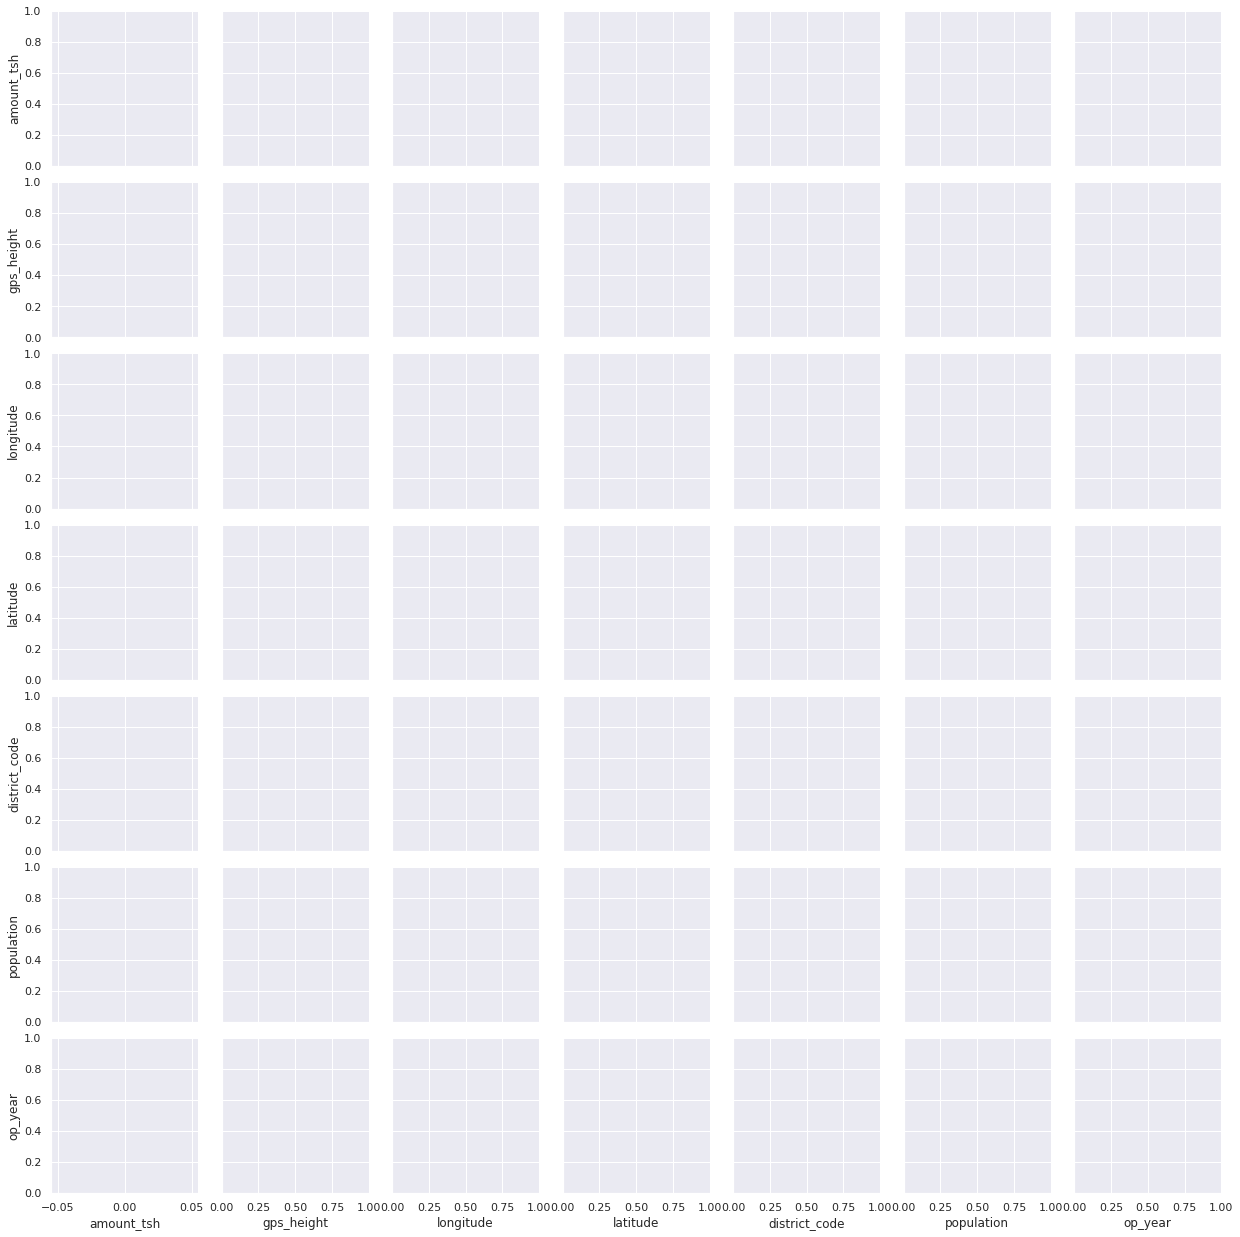

In [170]:
sns.pairplot(data=df_train_numeric)

In [228]:
df_train_numeric = pd.concat([df_train_numeric,df_train_label.status_group],axis=1)

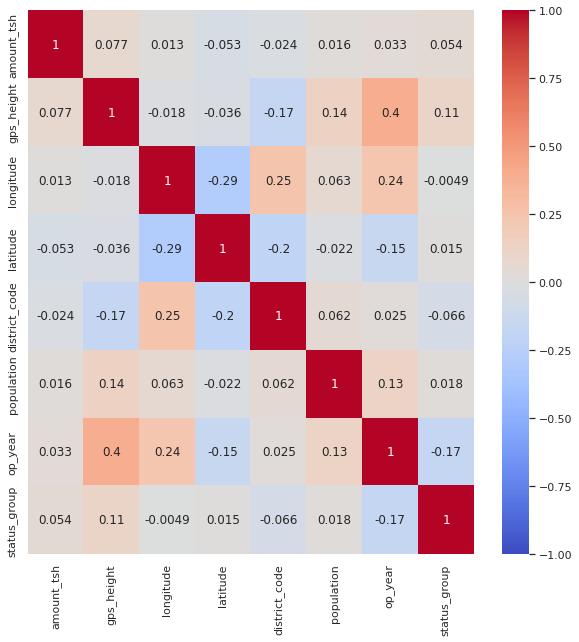

In [229]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train_numeric.corr(),vmin=-1,vmax=1,center=0,annot=True,cmap="coolwarm")
plt.show()

In [ ]:
sns.pairplot(df_train_numeric[['status_group','amount_tsh', 'gps_height',  'longitude', 'latitude', 'district_code',
       'population', 'op_year']],hue='status_group')

In [ ]:
#-----------TRANSFORM LAST CONDITION OF THE DATASETS TO CSV FILE TO USE LATER---------------

In [ ]:
#-----------------First Run------------------------

In [230]:
from sklearn.model_selection import train_test_split

y = df_train_label.status_group


In [ ]:
#LOGISTIC REGRESSION

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.25, random_state=101, shuffle=True)

In [232]:
lr = LogisticRegression(max_iter=1000)
logmodel=lr.fit(X_train,y_train)

logmodel.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([[-5.19596901e-05,  1.80836052e-05,  1.81761375e-02,
        -5.24492878e-02, -1.47800017e-04, -1.29707152e-04,
         1.16401283e-02, -5.20196111e-02, -1.17480780e-02,
         2.18301063e-02, -6.36166017e-02,  2.89097846e-02,
        -1.15193160e-02, -1.51314188e-02,  2.11011505e-02,
        -7.71162815e-04,  9.27191814e-02,  3.13004123e-02,
        -5.78577656e-02,  1.33582644e-02,  3.97354083e-02,
        -1.37314168e-02,  7.08589176e-02, -6.69711332e-04,
        -1.02594509e-01,  7.64397695e-03,  7.02290705e-02,
        -4.33136696e-02, -6.14508179e-02, -1.18374800e-02,
        -5.22409345e-03,  2.04670300e-02,  1.69029802e-02,
        -1.65086785e-02,  3.92866164e-02,  8.38934951e-03,
        -7.81821720e-03, -1.98948470e-02,  2.11140714e-02,
        -6.13006199e-03,  1.45000773e-02, -2.39788407e-02,
         1.34057233e-02,  7.98511794e-04, -2.54809956e-02,
         5.03994049e-03,  1.71626199e-01,  4.55930050e-02,
        -1.34310694e-02, -3.55063749e-03, -5.24815115e-0

In [233]:
logmodel.intercept_

array([ 0.02471631,  0.01397267, -0.03868897])

In [234]:
from sklearn.metrics import classification_report 

In [235]:
print(classification_report(y_train,logmodel.predict(X_train)))

              precision    recall  f1-score   support

           0       0.76      0.61      0.68     17036
           1       0.00      0.00      0.00      3213
           2       0.70      0.89      0.79     24301

    accuracy                           0.72     44550
   macro avg       0.49      0.50      0.49     44550
weighted avg       0.67      0.72      0.69     44550



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [236]:
print(classification_report(y_test,logmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.61      0.68      5788
           1       0.00      0.00      0.00      1104
           2       0.69      0.90      0.78      7958

    accuracy                           0.72     14850
   macro avg       0.49      0.50      0.49     14850
weighted avg       0.67      0.72      0.69     14850



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [237]:
from sklearn.metrics import accuracy_score 
y_pred = logmodel.predict(X_test)
accuracy_score(y_test, y_pred)

0.718922558922559

In [ ]:
#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

error_rate = []

for k in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  pred_k = knn.predict(X_test)
  error_rate.append(np.mean((pred_k!=y_test)))


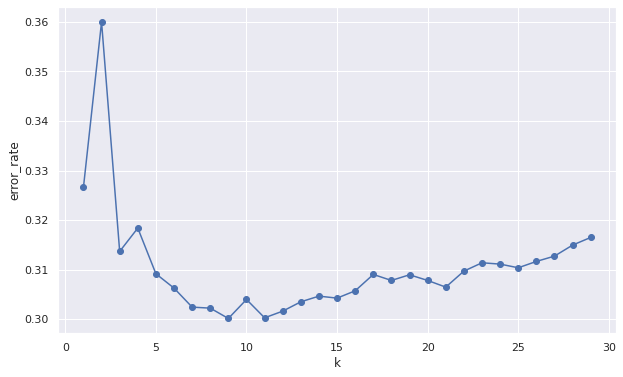

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,marker='o')
plt.xlabel('k')
plt.ylabel('error_rate')
plt.show()

In [ ]:
  knn = KNeighborsClassifier(n_neighbors=9)
  knn.fit(X_train,y_train)
  pred_k = knn.predict(X_test)
  print(classification_report(y_test,pred_k))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      5788
           1       0.52      0.21      0.30      1104
           2       0.71      0.81      0.76      7958

    accuracy                           0.70     14850
   macro avg       0.64      0.55      0.57     14850
weighted avg       0.69      0.70      0.69     14850



In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
#DECISION TREE

In [240]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [241]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[4387  237 1164]
 [ 208  452  444]
 [1140  501 6317]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      5788
           1       0.38      0.41      0.39      1104
           2       0.80      0.79      0.80      7958

    accuracy                           0.75     14850
   macro avg       0.65      0.65      0.65     14850
weighted avg       0.75      0.75      0.75     14850



In [242]:
dtree.get_depth()

44

In [ ]:
from sklearn import tree

In [ ]:
print(tree.export_text(dtree, feature_names=df_train.columns.to_list()))

|--- quantity_dry <= 0.50
|   |--- waterpoint_type_other <= 0.50
|   |   |--- waterpoint_type_communal standpipe multiple <= 0.50
|   |   |   |--- amount_tsh <= 1.50
|   |   |   |   |--- op_year <= 13.50
|   |   |   |   |   |--- source_type_borehole <= 0.50
|   |   |   |   |   |   |--- extraction_type_class_submersible <= 0.50
|   |   |   |   |   |   |   |--- quantity_enough <= 0.50
|   |   |   |   |   |   |   |   |--- installer_RWE <= 0.50
|   |   |   |   |   |   |   |   |   |--- latitude <= -1.25
|   |   |   |   |   |   |   |   |   |   |--- longitude <= 36.93
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 34
|   |   |   |   |   |   |   |   |   |   |--- longitude >  36.93
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 21
|   |   |   |   |   |   |   |   |   |--- latitude >  -1.25
|   |   |   |   |   |   |   |   |   |   |--- region_Mwanza <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   

In [ ]:
#RANDOM FOREST

In [ ]:
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)

In [ ]:
rfc_preds = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_preds))
print(classification_report(y_test,rfc_preds))

[[4521  122 1145]
 [ 174  403  527]
 [ 717  264 6977]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      5788
           1       0.51      0.37      0.43      1104
           2       0.81      0.88      0.84      7958

    accuracy                           0.80     14850
   macro avg       0.72      0.67      0.69     14850
weighted avg       0.80      0.80      0.80     14850



In [ ]:
df_test.drop(columns=["id"], inplace=True)

In [ ]:
pred = rfc.predict(df_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- funder_Magadini-makiwaru Water
- funder_W.B
- funder_Wvt
- installer_Handeni Trunk Main(
- installer_JAICA
- ...
Feature names seen at fit time, yet now missing:
- funder_Ded
- funder_Go
- funder_Plan Int
- installer_Centr
- installer_FW
- ...

  warnings.warn(message, FutureWarning)


In [ ]:
pred = pred.astype(object)

In [ ]:
for i in range (len(pred)):
  if (pred[i] == 2):
    pred[i] = 'functional'
  elif (pred[i] == 0):
    pred[i] = 'non functional'
  else:
    pred[i] = 'functional needs repair'

In [ ]:
pred

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [ ]:
df_format=pd.read_csv('/content/Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv')


In [ ]:
df_format["status_group"] = pred

In [ ]:
df_format.to_csv("Fatih_Naz_Kaan.csv",index=False)

In [ ]:
rfc_preds = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_preds))
print(classification_report(y_test,rfc_preds))

[[4521  122 1145]
 [ 174  403  527]
 [ 717  264 6977]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      5788
           1       0.51      0.37      0.43      1104
           2       0.81      0.88      0.84      7958

    accuracy                           0.80     14850
   macro avg       0.72      0.67      0.69     14850
weighted avg       0.80      0.80      0.80     14850



In [ ]:
#GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbt = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 500)
gbt.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=4, n_estimators=500)

In [ ]:
gbt_preds = gbt.predict(X_test)
print(confusion_matrix(y_test,gbt_preds))
print(classification_report(y_test,gbt_preds))

[[4140   48 1600]
 [ 159  284  661]
 [ 541   95 7322]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78      5788
           1       0.67      0.26      0.37      1104
           2       0.76      0.92      0.83      7958

    accuracy                           0.79     14850
   macro avg       0.76      0.63      0.66     14850
weighted avg       0.79      0.79      0.78     14850



In [ ]:
#XGB BOOSTING

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=100,reg_alpha=1,reg_lambda=0.01)
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob', reg_alpha=1, reg_lambda=0.01)

In [ ]:
xgb_preds = xgb.predict(X_test)
print(confusion_matrix(y_test,xgb_preds))
print(classification_report(y_test,xgb_preds))

[[3519   31 2238]
 [ 150  130  824]
 [ 481   37 7440]]
              precision    recall  f1-score   support

           0       0.85      0.61      0.71      5788
           1       0.66      0.12      0.20      1104
           2       0.71      0.93      0.81      7958

    accuracy                           0.75     14850
   macro avg       0.74      0.55      0.57     14850
weighted avg       0.76      0.75      0.72     14850



In [ ]:
#APPLYING GRID SEARCH CV

In [ ]:
seed =1

models = ["DTC","RFC","GBT","XGB"]
clfs = [DecisionTreeClassifier(random_state=seed),
       RandomForestClassifier(random_state=seed),
       GradientBoostingClassifier(random_state=seed),
                        XGBClassifier(random_state=seed)]
params = {
    models[0]:{"max_depth":[2,4,6,8,10]},
    models[1]:{"n_estimators":[10,50,100,500,1000]},
    models[2]:{'learning_rate':[0.01,0.1],'n_estimators':[10,50,100,500], 'max_depth':[2,3,4]},
    models[3]:{'reg_lambda':[0.1,0.3,5,10],'n_estimators':[50,100,500],'reg_alpha':[0.1,0.3,0.5,1]}
}

In [ ]:
for name,estimator in zip(models,clfs):
  print(name)
  clf = GridSearchCV(estimator,params[name],scoring='accuracy')
  clf.fit(X_train,y_train)
  print("best params: " + str(clf.best_params_))
  print("best scores: " + str(clf.best_score_))
  preds = clf.predict(X_test)
  print("Accuracy :",metrics.accuracy_score(y_test,preds))

In [ ]:
#--------------------Second Run---------------------------------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [ ]:
df_train=pd.read_csv('/content/df_train.csv')
df_test=pd.read_csv('/content/df_test.csv')

In [ ]:
df_train_label=pd.read_csv('/content/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

In [ ]:
#DROPPING FUNDER AND INSTALLER

In [ ]:
df_test.drop(df_test.columns[df_test.columns.str.contains('funder')], axis=1, inplace=True)
df_test = df_test.drop(df_test.columns[df_test.columns.str.contains('installer')], axis=1)
df_train = df_train.drop(df_train.columns[df_train.columns.str.contains('funder')],axis=1)
df_train = df_train.drop(df_train.columns[df_train.columns.str.contains('installer')], axis=1)

In [ ]:
for i in range (len(df_train_label)):
  if (df_train_label.iat[i,1] == 'functional'):
    df_train_label.iat[i,1] = 2
  elif (df_train_label.iat[i,1] == 'non functional'):
    df_train_label.iat[i,1] = 0
  else:
    df_train_label.iat[i,1] = 1

In [ ]:
for i in range(len(df_train)):
  if(df_train.op_year[i] < 0):
    df_train.op_year[i] = df_train.op_year[i] * -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_train_label

,id,status_group
0,69572,2
1,8776,2
2,34310,2
3,67743,0
4,19728,2
...,...,...
59395,60739,2
59396,27263,2
59397,37057,2
59398,31282,2


In [ ]:
df_label = df_train_label.merge(df_train, how = "outer", on = "id")    

In [ ]:
df_label.drop(columns=["status_group"], inplace=True)

In [ ]:
df_train = df_label

In [ ]:
df_train_label.status_group = df_train_label.status_group.astype(int)

In [ ]:
df_train_label.drop(columns=['id'],inplace=True)
df_train.drop(columns=['id'],inplace=True)

In [ ]:
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


y = df_train_label.status_group


X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.25, random_state=101, shuffle=True)

In [ ]:
xgb = XGBClassifier(data = X_train, objective = "multi:softmax", booster = "gbtree",
                       eval_metric = "merror", nrounds = 500, 
                       num_class = 3,eta = .1, max_depth=18, colsample_bytree = .5,early_stopping_rounds = 10,
                       gamma=1)
xgb.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.5,
              data=       amount_tsh  gps_height  longitude   latitude  district_code  \
19197         0.0        1782  36.605607  -3.219906              2   
21938         0.0           0  36.283302  -6.644873              1   
48061         0.0        1408  36.947672  -3.163667              7   
14413       200.0         257  36.910132  -7.836452              3   
57388         0.0           0  34.019720  -3.904369             80   
...           ...         ...        ...        ...            ...   
5695          0.0         453  34.809181 -11.303619              3   
8006         50.0         -20  40.174976 -10.288177              5   
17745         0.0          62  39.101825  -6.941153              2...
       waterpoint_type_hand pump  waterpoint_type_improved spring  \
19197                          0                                0   
21938                          1                                0   
48061                          0      

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
xgb_preds = xgb.predict(X_test)
print(confusion_matrix(y_test,xgb_preds))
print(classification_report(y_test,xgb_preds))

[[4457   64 1267]
 [ 155  358  591]
 [ 599  139 7220]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.81      5788
           1       0.64      0.32      0.43      1104
           2       0.80      0.91      0.85      7958

    accuracy                           0.81     14850
   macro avg       0.76      0.67      0.70     14850
weighted avg       0.81      0.81      0.80     14850



In [ ]:
df_test.drop(columns = ["id"], inplace=True)

In [ ]:
pred = xgb.predict(df_test)

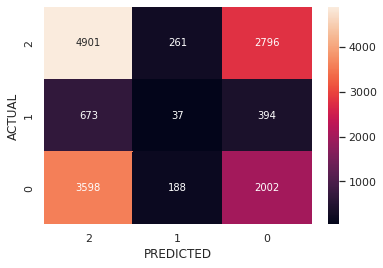

In [ ]:
# with counts:
cm = confusion_matrix( y_test, pred, labels=[2, 1,0] )
sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = ["2","1", "0"] , 
                yticklabels = ["2","1", "0"] )
plt.ylabel('ACTUAL')
plt.xlabel('PREDICTED')
plt.show()

In [ ]:
xgb.predict_proba(X_test)

array([[0.01792832, 0.00957068, 0.97250104],
       [0.02547846, 0.00433751, 0.970184  ],
       [0.1562733 , 0.00815115, 0.8355756 ],
       ...,
       [0.8748674 , 0.04546949, 0.07966314],
       [0.41827276, 0.01247398, 0.56925327],
       [0.9211015 , 0.0495983 , 0.02930018]], dtype=float32)

In [ ]:
y_test

102      2
35795    2
29812    2
51442    1
34748    0
        ..
871      2
7053     0
4071     0
8717     2
32382    1
Name: status_group, Length: 14850, dtype: int64

In [ ]:
y_test.drop(columns=["id"],inplace=True)

In [ ]:
y_pred= xgb.predict(X_test)

IndexError: ignored

In [ ]:
from sklearn.metrics import roc_curve, auc

# Determine the false positive and true positive rates for ROC
fpr, tpr, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='RF (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: ignored

In [ ]:
pred = pred.astype(object)

In [ ]:
for i in range (len(pred)):
  if (pred[i] == 2):
    pred[i] = 'functional'
  elif (pred[i] == 0):
    pred[i] = 'non functional'
  else:
    pred[i] = 'functional needs repair'

In [ ]:
df_format=pd.read_csv('/content/Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv')

In [ ]:
df_format["status_group"] = pred

In [ ]:
df_format.to_csv("Fatih_Naz_Kaan_8.csv",index=False)

In [ ]:
#-----------------Third Run----------------------------------------

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [31]:
df_train=pd.read_csv('/content/df_train.csv')
df_test=pd.read_csv('/content/df_test.csv')

In [32]:
df_train_label=pd.read_csv('/content/Pump_it_Up_Data_Mining_the_Water_Table_-_Training_set_labels.csv')

In [33]:
for i in range (len(df_train_label)):
  if (df_train_label.iat[i,1] == 'functional'):
    df_train_label.iat[i,1] = 2
  elif (df_train_label.iat[i,1] == 'non functional'):
    df_train_label.iat[i,1] = 0
  else:
    df_train_label.iat[i,1] = 1

In [34]:
for i in range(len(df_train)):
  if(df_train.op_year[i] < 0):
    df_train.op_year[i] = df_train.op_year[i] * -1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
df_label = df_train_label.merge(df_train, how = "outer", on = "id")   

In [36]:
df_label.drop(columns=["status_group"], inplace=True)

In [37]:
df_train = df_label

In [38]:
df_train_label.status_group = df_train_label.status_group.astype(int)

In [39]:
df_train_label.drop(columns=['id'],inplace=True)
df_train.drop(columns=['id'],inplace=True)

In [40]:
df_test.drop(columns=["funder_Wvt", "installer_Kuwait", "installer_JAICA", "installer_Mission", 
                      "funder_W.B", "installer_Handeni Trunk Main(", "funder_Magadini-makiwaru Water"], inplace=True)

In [41]:
df_train.drop(columns=["funder_Ded", "installer_FW", "installer_MWE", "funder_Plan Int", "installer_Centr", "installer_Idara ya maji", 
                       "funder_Go"], inplace=True)

In [42]:
import xgboost 
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split


y = df_train_label.status_group


X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.25, random_state=101, shuffle=True)

In [19]:
xgb = XGBClassifier(data = X_train, objective = "multi:softmax", booster = "gbtree",
                       eval_metric = "merror", nrounds = 500, 
                       num_class = 3,eta = .1, max_depth=18, colsample_bytree = .5,early_stopping_rounds = 10,
                       gamma=1)
xgb.fit(X_train,y_train)

XGBClassifier(colsample_bytree=0.5,
              data=       amount_tsh  gps_height  longitude   latitude  district_code  \
19197         0.0        1782  36.605607  -3.219906              2   
21938         0.0           0  36.283302  -6.644873              1   
48061         0.0        1408  36.947672  -3.163667              7   
14413       200.0         257  36.910132  -7.836452              3   
57388         0.0           0  34.019720  -3.904369             80   
...           ...         ...        ...        ...            ...   
5695          0.0         453  34.809181 -11.303619              3   
8006         50.0         -20  40.174976 -10.288177              5   
17745         0.0          62  39.101825  -6.941153              2...
...                    ...               ...           ...            ...   
5695                     0                 0             0              0   
8006                     0                 0             0              0   
17745         

In [46]:
xgb_preds = xgb.predict(X_test)
print(confusion_matrix(y_test,xgb_preds))
print(classification_report(y_test,xgb_preds))

[[4475   69 1244]
 [ 149  357  598]
 [ 569  111 7278]]
              precision    recall  f1-score   support

           0       0.86      0.77      0.82      5788
           1       0.66      0.32      0.44      1104
           2       0.80      0.91      0.85      7958

    accuracy                           0.82     14850
   macro avg       0.77      0.67      0.70     14850
weighted avg       0.81      0.82      0.81     14850



In [47]:
df_test.drop(columns = ["id"], inplace=True)

In [ ]:
#DROPPING SOME OF THE UNWANTED COLUMNS

In [48]:
pred = xgb.predict(df_test)

In [49]:
pred = pred.astype(object)

In [50]:
for i in range (len(pred)):
  if (pred[i] == 2):
    pred[i] = 'functional'
  elif (pred[i] == 0):
    pred[i] = 'non functional'
  else:
    pred[i] = 'functional needs repair'

In [51]:
df_format=pd.read_csv('/content/Pump_it_Up_Data_Mining_the_Water_Table_-_Submission_format.csv')

In [52]:
df_format["status_group"] = pred

In [54]:
df_format.to_csv("Fatih_Naz_Kaan_10.csv",index=False)